In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
print("Observations:")
print("1. California, Texas, New York, Florida and Illinois generate the most loan volume while all other states generate less than 4% each, but more than 58% combined.")
print("2. Almost 90% of the loan volume is from debt consolidation, credit card refinancing and home improvement loans.")
print("3. The highest rate is charged on business loans.")
print("4. The largest loans are business loans, debt consolidation, and credit card refinancing loans in decending order.")
print("5. The loans are graded A-F, with A costing the least in interest and F the most. The rate rises linearly with the letters.")
print("6. The lowest income borrowers borrow for vacations, while those with the highest income borrow to invest in businesses.")
print("7. The amount borrowed starts at about $15k for annual income level $30k, rising linearly to $40k for incomes above $80k.")
print("8. The longest term loans are for debt consolidation and home buying.")

Observations:
1. California, Texas, New York, Florida and Illinois generate the most loan volume while all other states generate less than 4% each, but more than 58% combined.
2. Almost 90% of the loan volume is from debt consolidation, credit card refinancing and home improvement loans.
3. The highest rate is charged on business loans.
4. The largest loans are business loans, debt consolidation, and credit card refinancing loans in decending order.
5. The loans are graded A-F, with A costing the least in interest and F the most. The rate rises linearly with the letters.
6. The lowest income borrowers borrow for vacations, while those with the highest income borrow to invest in businesses.
7. The amount borrowed starts at about $15k for annual income level $30k, rising linearly to $40k for incomes above $80k.
8. The longest term loans are for debt consolidation and home buying.


In [3]:
# Read CSV
LoanStats_df = pd.read_csv("LoanStatsJune.csv")
#LoanStats_df.head()
#type(LoanStats_df)
#LoanStats_df.dtypes
LoanStats_df.shape
#LoanStats_df.columns

(134980, 15)

In [4]:
VolumeByStateL1_df = LoanStats_df[["addr_state","loan_amnt"]]
VolumeByStateL2_df = VolumeByStateL1_df.groupby("addr_state").sum().reset_index()
#VolumeByStateL2_df

In [5]:
TotalVolume = VolumeByStateL2_df["loan_amnt"].sum()
VolumeByStateL2_df["Proportion"]= VolumeByStateL2_df["loan_amnt"]/TotalVolume

#df['New Value'] = np.where(df['E'] == 'ABC', df['C'], df['E'])
VolumeByStateL2_df["State"]=np.where(VolumeByStateL2_df["Proportion"]>0.04,VolumeByStateL2_df["addr_state"],"Other")
VolumeByStateL3_df = VolumeByStateL2_df[["State","loan_amnt"]]
VolumeByStateL4_df = VolumeByStateL3_df.groupby("State").sum().reset_index()
#VolumeByStateL4_df

In [6]:
VolumeByStateL4_df.sort_values(by=["loan_amnt"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
VolumeByStateL4_df

,State,loan_amnt
4,Other,1145389200
0,CA,275164325
5,TX,165884950
3,NY,164415375
1,FL,133824175
2,IL,85311175


In [7]:
plt.title("Loan Volume by State")

# Labels for the sections of our pie chart
labels = VolumeByStateL4_df["State"]

# The values of each section of the pie chart
sizes = VolumeByStateL4_df["loan_amnt"]

# The colors of each section of the pie chart
#colors = TotalFaresbyCityTypeL3_df["Color"]


In [8]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x215322381d0>,
 [Text(-0.470867,-0.994125,'Other'),
  Text(1.06519,0.274543,'CA'),
  Text(0.634827,0.898328,'TX'),
  Text(0.0971728,1.0957,'NY'),
  Text(-0.415312,1.01859,'FL'),
  Text(-0.738964,0.81482,'IL')],
 [Text(-0.256837,-0.54225,'58.1%'),
  Text(0.581012,0.149751,'14.0%'),
  Text(0.34627,0.489997,'8.4%'),
  Text(0.0530034,0.597654,'8.3%'),
  Text(-0.226534,0.555592,'6.8%'),
  Text(-0.403071,0.444447,'4.3%')])

In [9]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1105547211503075,
 1.1108600495382563,
 -1.1023789625881524,
 1.1041175595700408)

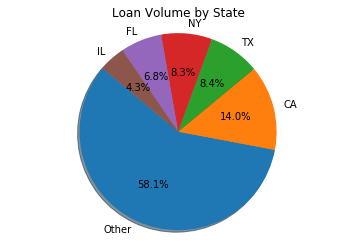

In [10]:
# Prints our pie chart to the screen
plt.show()

In [11]:
VolumeByTypeL1_df = LoanStats_df[["title","loan_amnt"]]
VolumeByTypeL2_df = VolumeByTypeL1_df.groupby("title").sum().reset_index()
VolumeByTypeL2_df["Type"]=VolumeByTypeL2_df["title"]
VolumeByTypeL2_df

,title,loan_amnt,Type
0,Business,22655125,Business
1,Car financing,13715875,Car financing
2,Credit card refinancing,427936250,Credit card refinancing
3,Debt consolidation,1200169900,Debt consolidation
4,Green loan,942175,Green loan
5,Home buying,9420650,Home buying
6,Home improvement,143504500,Home improvement
7,Major purchase,38712150,Major purchase
8,Medical expenses,15173700,Medical expenses
9,Moving and relocation,8872000,Moving and relocation


In [12]:
TotalVolume = VolumeByTypeL2_df["loan_amnt"].sum()
VolumeByTypeL2_df["Proportion"]= VolumeByTypeL2_df["loan_amnt"]/TotalVolume

#df['New Value'] = np.where(df['E'] == 'ABC', df['C'], df['E'])
VolumeByTypeL2_df["Type"]=np.where(VolumeByTypeL2_df["Proportion"]>0.04,VolumeByTypeL2_df["title"],"Other")
VolumeByTypeL3_df = VolumeByTypeL2_df[["Type","loan_amnt"]]
VolumeByTypeL4_df = VolumeByTypeL3_df.groupby("Type").sum().reset_index()
VolumeByTypeL4_df

,Type,loan_amnt
0,Credit card refinancing,427936250
1,Debt consolidation,1200169900
2,Home improvement,143504500
3,Other,198413550


In [13]:
VolumeByTypeL4_df.sort_values(by=["loan_amnt"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
VolumeByTypeL4_df

,Type,loan_amnt
1,Debt consolidation,1200169900
0,Credit card refinancing,427936250
3,Other,198413550
2,Home improvement,143504500


In [14]:
plt.title("Loan Volume by Loan Type")

# Labels for the sections of our pie chart
labels = VolumeByTypeL4_df["Type"]

# The values of each section of the pie chart
sizes = VolumeByTypeL4_df["loan_amnt"]

# The colors of each section of the pie chart
#colors = TotalFaresbyCityTypeL3_df["Color"]


In [15]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(x=sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x215324110b8>,
 [Text(-0.38237,-1.0314,'Debt consolidation'),
  Text(0.861848,0.683533,'Credit card refinancing'),
  Text(-0.108243,1.09466,'Other'),
  Text(-0.660279,0.879791,'Home improvement')],
 [Text(-0.208566,-0.562584,'60.9%'),
  Text(0.470099,0.372836,'21.7%'),
  Text(-0.0590417,0.597088,'10.1%'),
  Text(-0.360152,0.479886,'7.3%')])

In [16]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1115675350746805,
 1.1033416453882836,
 -1.1130059742242522,
 1.1064302613756116)

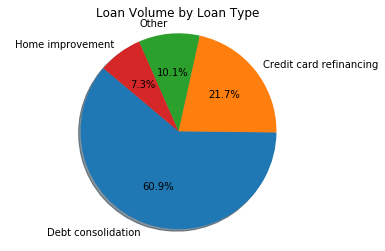

In [17]:
# Prints our pie chart to the screen
plt.show()

In [18]:
LoanCountByLoanTypeL1_df = LoanStats_df[["title","loan_amnt"]]
LoanCountByLoanTypeL2_df = LoanCountByLoanTypeL1_df.groupby("title").count().reset_index()
LoanCountByLoanTypeL2_df = LoanCountByLoanTypeL2_df.rename(columns = {'loan_amnt':'Count'})
LoanCountByLoanTypeL2_df

,title,Count
0,Business,1418
1,Car financing,1564
2,Credit card refinancing,28071
3,Debt consolidation,77557
4,Green loan,91
5,Home buying,616
6,Home improvement,10191
7,Major purchase,3235
8,Medical expenses,1640
9,Moving and relocation,1113


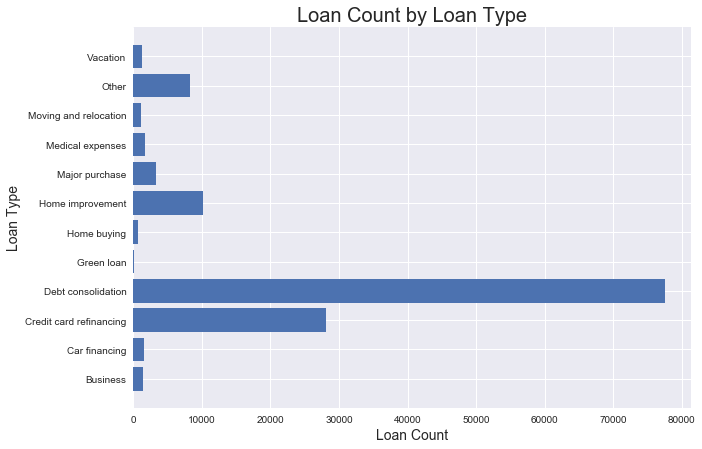

In [19]:
x=LoanCountByLoanTypeL2_df["title"]
y=LoanCountByLoanTypeL2_df["Count"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Loan Count by Loan Type", fontsize =20)
plt.xlabel("Loan Count", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [20]:
RateByLoanTypeL1_df = LoanStats_df[["title","int_rate"]]
RateByLoanTypeL2_df = RateByLoanTypeL1_df.groupby("title").mean().reset_index()
RateByLoanTypeL2_df.dtypes

title        object
int_rate    float64
dtype: object

In [21]:
RateByLoanTypeL2_df.sort_values(by=["int_rate"], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
RateByLoanTypeL2_df

,title,int_rate
5,Home buying,0.150357
0,Business,0.149690
4,Green loan,0.146813
9,Moving and relocation,0.139829
10,Other,0.137913
3,Debt consolidation,0.130221
8,Medical expenses,0.129378
11,Vacation,0.129162
6,Home improvement,0.119502
7,Major purchase,0.118884


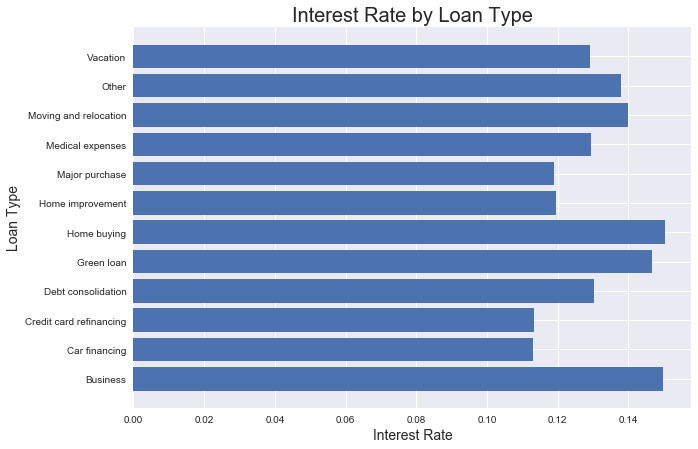

In [22]:
x=RateByLoanTypeL2_df["title"]
y=RateByLoanTypeL2_df["int_rate"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Interest Rate by Loan Type", fontsize =20)
plt.xlabel("Interest Rate", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [23]:
LoanSizeByLoanTypeL1_df = LoanStats_df[["title","loan_amnt"]]
LoanSizeByLoanTypeL2_df = LoanSizeByLoanTypeL1_df.groupby("title").mean().reset_index()
LoanSizeByLoanTypeL2_df

,title,loan_amnt
0,Business,15976.815938
1,Car financing,8769.741049
2,Credit card refinancing,15244.781091
3,Debt consolidation,15474.681847
4,Green loan,10353.571429
5,Home buying,15293.262987
6,Home improvement,14081.493475
7,Major purchase,11966.661515
8,Medical expenses,9252.256098
9,Moving and relocation,7971.248877


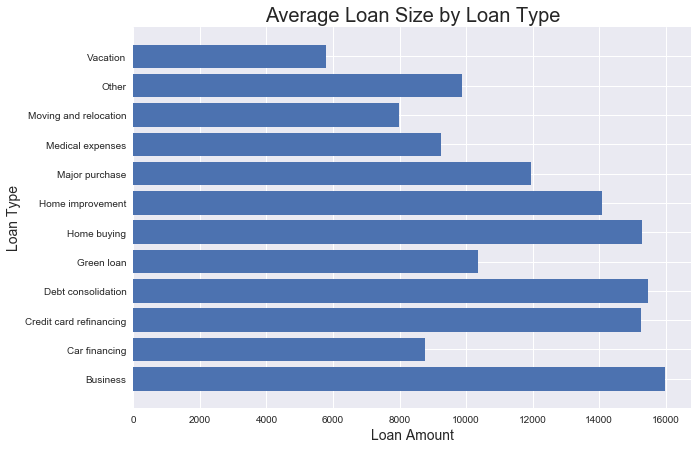

In [24]:
x=LoanSizeByLoanTypeL2_df["title"]
y=LoanSizeByLoanTypeL2_df["loan_amnt"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Loan Size by Loan Type", fontsize =20)
plt.xlabel("Loan Amount", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [25]:
RateByGradeL1_df = LoanStats_df[["grade","int_rate"]]
RateByGradeL2_df = RateByGradeL1_df.groupby("grade").mean().reset_index()
RateByGradeL2_df

,grade,int_rate
0,A,0.065871
1,B,0.100135
2,C,0.135670
3,D,0.172667
4,E,0.207444
5,F,0.244924
6,G,0.275067


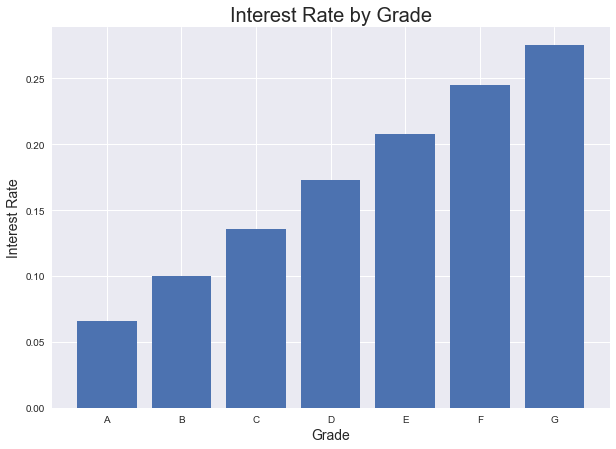

In [26]:
x=RateByGradeL2_df["grade"]
y=RateByGradeL2_df["int_rate"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.bar(x,y)
plt.title("Interest Rate by Grade", fontsize =20)
plt.xlabel("Grade", fontsize=14)
plt.ylabel("Interest Rate", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [27]:
LoanTypeByincomeL1_df = LoanStats_df[["title","annual_inc"]]
LoanTypeByincomeL2_df = LoanTypeByincomeL1_df.groupby("title").mean().reset_index()
LoanTypeByincomeL2_df

,title,annual_inc
0,Business,92246.861072
1,Car financing,70096.852302
2,Credit card refinancing,76728.572049
3,Debt consolidation,75554.755973
4,Green loan,74115.175824
5,Home buying,80947.612013
6,Home improvement,91797.297125
7,Major purchase,79386.724266
8,Medical expenses,74222.316463
9,Moving and relocation,69433.835580


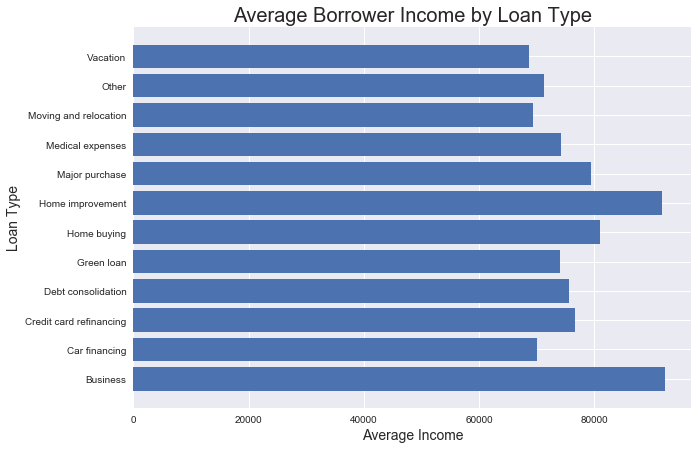

In [28]:
x=LoanTypeByincomeL2_df["title"]
y=LoanTypeByincomeL2_df["annual_inc"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Borrower Income by Loan Type", fontsize =20)
plt.xlabel("Average Income", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()

In [29]:
LoanAmountByIncome_df = LoanStats_df[["annual_inc","loan_amnt"]]
LoanAmountByIncome_df.head()

,annual_inc,loan_amnt
0,62000.0,6000
1,51000.0,19200
2,84000.0,19000
3,27000.0,5400
4,107000.0,21000


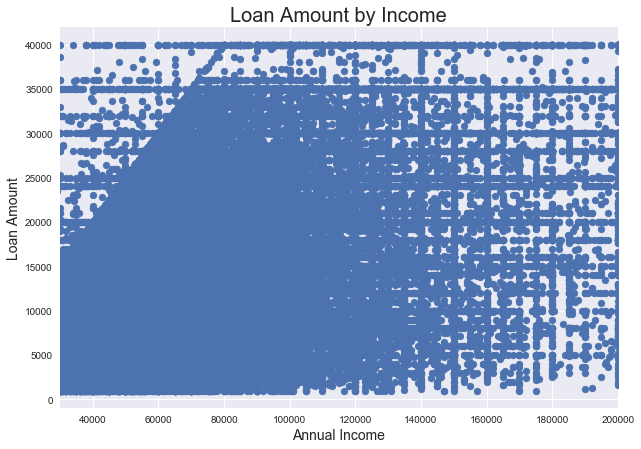

In [30]:
x=LoanAmountByIncome_df["annual_inc"]
y=LoanAmountByIncome_df["loan_amnt"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.scatter(x,y)
plt.title("Loan Amount by Income", fontsize =20)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.xlim(30000,200000)
#plt.ylim(-1,1)
plt.show()

In [31]:
TermByLoanTypeL1_df = LoanStats_df[["title","term"]]
TermByLoanTypeL1_df.head()

,title,term
0,Debt consolidation,36 months
1,Debt consolidation,60 months
2,Debt consolidation,36 months
3,Moving and relocation,36 months
4,Debt consolidation,60 months


In [32]:
TermByLoanTypeL2_df = pd.DataFrame()
TermByLoanTypeL2_df["Title"] = LoanStats_df["title"]
TermByLoanTypeL2_df["Term"] = TermByLoanTypeL1_df["term"].str.extract('(\d\d)', expand=True)
TermByLoanTypeL2_df['Term'] = pd.to_numeric(TermByLoanTypeL2_df['Term'])
TermByLoanTypeL2_df.head()

,Title,Term
0,Debt consolidation,36
1,Debt consolidation,60
2,Debt consolidation,36
3,Moving and relocation,36
4,Debt consolidation,60


In [33]:
TermByLoanTypeL2_df.dtypes
TermByLoanTypeL2_df = TermByLoanTypeL2_df.groupby("Title").mean().reset_index()
TermByLoanTypeL2_df

,Title,Term
0,Business,42.076164
1,Car financing,40.143223
2,Credit card refinancing,42.308005
3,Debt consolidation,43.612775
4,Green loan,39.956044
5,Home buying,43.285714
6,Home improvement,42.709450
7,Major purchase,41.586399
8,Medical expenses,40.302439
9,Moving and relocation,39.212938


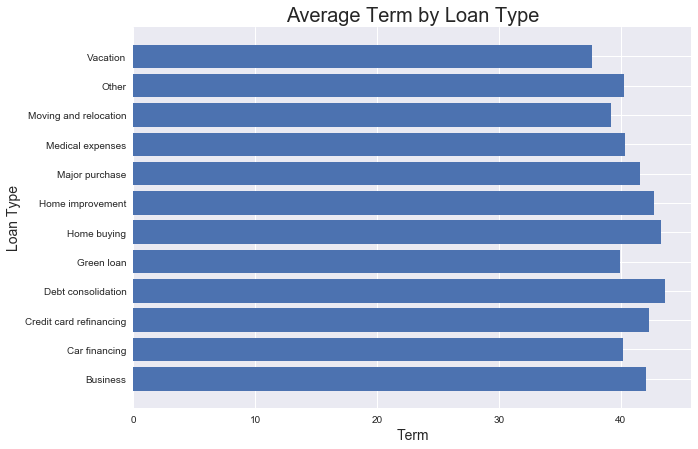

In [34]:
x=TermByLoanTypeL2_df["Title"]
y=TermByLoanTypeL2_df["Term"]

plt.figure(figsize=(10,7))
sns.set()
plt.grid(True)
plt.barh(x,y)
plt.title("Average Term by Loan Type", fontsize =20)
plt.xlabel("Term", fontsize=14)
plt.ylabel("Loan Type", fontsize=14)
#plt.xlim(1,100)
#plt.ylim(-1,1)
plt.show()